# DIP Digital Bank User Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from dython.nominal import associations 
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import date

from sklearn.inspection import permutation_importance

## Clean train_dataset and test_dataset

In [2]:
train_dataset = pd.read_csv("trainset for NTU_v1.csv")
train_dataset.head()

,Registration_date,Client_ID,Current_age,Genders,STATE,is_shopee_seller,last_30_days_GMV,last_365_days_GMV,last_30_days_orders,last_365_days_orders,Dbank_activated,Top_1_purchase_category,Top_2_purchase_category,Top_3_purchase_category
0,2016/12/7,1,70,2,KALIMANTAN BARAT,0,2949,61943,45,46,0,Home & Living,Beauty,Women Bags
1,2016/12/7,2,59,1,JAMBI,0,7834,60755,324,1168,1,Automotive,Men Bags,Women Shoes
2,2016/12/7,3,34,4,KALIMANTAN TENGAH,0,5552,55116,440,4632,0,Women Bags,Others,Food & Beverages
3,2016/12/8,4,26,1,JAWA TIMUR,1,9343,111888,124,1522,0,Food & Beverages,Men Bags,Men Clothes
4,2016/12/8,5,51,3,NUSA TENGGARA BARAT (NTB),0,8712,41862,919,725,0,Home & Living,Electronics,NaN


In [3]:
train_dataset.shape

(400000, 14)

In [4]:
train_dataset.isnull().sum()

Registration_date              0
Client_ID                      0
Current_age                    0
Genders                        0
STATE                      10142
is_shopee_seller               0
last_30_days_GMV               0
last_365_days_GMV              0
last_30_days_orders            0
last_365_days_orders           0
Dbank_activated                0
Top_1_purchase_category        0
Top_2_purchase_category        0
Top_3_purchase_category    31252
dtype: int64

In [5]:
test_dataset = pd.read_csv("testset for NTU_v1.csv")
test_dataset.head()

,Registration_date,Client_ID,Current_age,Genders,STATE,is_shopee_seller,last_30_days_GMV,last_365_days_GMV,last_30_days_orders,last_365_days_orders,Dbank_activated,Top_1_purchase_category,Top_2_purchase_category,Top_3_purchase_category
0,2016/1/1,1,68,2,JAWA TIMUR,1,7314,75907,630,631,0,Automotive,Women Bags,Women Shoes
1,2016/1/1,2,26,1,JAWA TENGAH,0,727,88871,18,935,0,Home & Living,Men Shoes,Women Bags
2,2016/1/1,3,33,2,JAWA TIMUR,1,6536,107454,404,405,0,Automotive,Food & Beverages,Mobile & Accessories
3,2016/1/1,4,45,1,SUMATERA BARAT,0,3142,55072,243,2372,0,Automotive,Men Bags,Women Shoes
4,2016/1/1,5,52,2,BALI,1,8998,73500,463,612,1,Mobile & Accessories,Home & Living,Food & Beverages


In [6]:
test_dataset.shape

(100000, 14)

In [7]:
test_dataset.isnull().sum()

Registration_date             0
Client_ID                     0
Current_age                   0
Genders                       0
STATE                      2485
is_shopee_seller              0
last_30_days_GMV              0
last_365_days_GMV             0
last_30_days_orders           0
last_365_days_orders          0
Dbank_activated               0
Top_1_purchase_category       0
Top_2_purchase_category       0
Top_3_purchase_category    7823
dtype: int64

In [8]:
#Filling Unknown Value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
train_dataset['STATE'] = imputer.fit_transform(train_dataset[['STATE']])
test_dataset['STATE'] = imputer.fit_transform(test_dataset[['STATE']])
# Checking for null values in the Cabin column
train_dataset['STATE'].isnull().sum()
# Value counts for Cabin column

0

In [9]:
test_dataset['STATE'].isnull().sum()

0

In [10]:
train_dataset['Top_3_purchase_category'] = imputer.fit_transform(train_dataset[['Top_3_purchase_category']])
test_dataset['Top_3_purchase_category'] = imputer.fit_transform(test_dataset[['Top_3_purchase_category']])
# Checking for null values in the Cabin column
train_dataset['Top_3_purchase_category'].isnull().sum()
# Value counts for Cabin column

0

In [11]:
test_dataset['Top_3_purchase_category'].isnull().sum()

0

In [12]:
mean_value=train_dataset['last_30_days_orders'].mean()
train_dataset['last_30_days_orders'].fillna(value=mean_value, inplace=True)

In [13]:
train_dataset.isnull().sum()

Registration_date          0
Client_ID                  0
Current_age                0
Genders                    0
STATE                      0
is_shopee_seller           0
last_30_days_GMV           0
last_365_days_GMV          0
last_30_days_orders        0
last_365_days_orders       0
Dbank_activated            0
Top_1_purchase_category    0
Top_2_purchase_category    0
Top_3_purchase_category    0
dtype: int64

In [14]:
test_dataset.isnull().sum()

Registration_date          0
Client_ID                  0
Current_age                0
Genders                    0
STATE                      0
is_shopee_seller           0
last_30_days_GMV           0
last_365_days_GMV          0
last_30_days_orders        0
last_365_days_orders       0
Dbank_activated            0
Top_1_purchase_category    0
Top_2_purchase_category    0
Top_3_purchase_category    0
dtype: int64

## Dropping Unnecessary Features

In [15]:
train_dataset = train_dataset.drop(['Client_ID'], axis=1)
test_dataset = test_dataset.drop(['Client_ID'], axis=1)

## Encoding Registration_date (Categorical Feature) into Register_Since (Nummerical Feature)

In [16]:
train_dataset['Registration_date'] = pd.to_datetime(train_dataset['Registration_date'])
train_dataset['Register_Since'] = np.datetime64('today') - train_dataset['Registration_date']
train_dataset = train_dataset.drop(['Registration_date'], axis=1)
train_dataset['Register_Since'] = train_dataset['Register_Since'].astype('timedelta64[D]')

test_dataset['Registration_date'] = pd.to_datetime(test_dataset['Registration_date'])
test_dataset['Register_Since'] = np.datetime64('today') - test_dataset['Registration_date']
test_dataset = test_dataset.drop(['Registration_date'], axis=1)
test_dataset['Register_Since'] = test_dataset['Register_Since'].astype('timedelta64[D]')

## Data Analysis of trainset

In [17]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Current_age              400000 non-null  int64  
 1   Genders                  400000 non-null  int64  
 2   STATE                    400000 non-null  object 
 3   is_shopee_seller         400000 non-null  int64  
 4   last_30_days_GMV         400000 non-null  int64  
 5   last_365_days_GMV        400000 non-null  int64  
 6   last_30_days_orders      400000 non-null  int64  
 7   last_365_days_orders     400000 non-null  int64  
 8   Dbank_activated          400000 non-null  int64  
 9   Top_1_purchase_category  400000 non-null  object 
 10  Top_2_purchase_category  400000 non-null  object 
 11  Top_3_purchase_category  400000 non-null  object 
 12  Register_Since           400000 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 39.7+ MB


In [18]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Current_age              100000 non-null  int64  
 1   Genders                  100000 non-null  int64  
 2   STATE                    100000 non-null  object 
 3   is_shopee_seller         100000 non-null  int64  
 4   last_30_days_GMV         100000 non-null  int64  
 5   last_365_days_GMV        100000 non-null  int64  
 6   last_30_days_orders      100000 non-null  int64  
 7   last_365_days_orders     100000 non-null  int64  
 8   Dbank_activated          100000 non-null  int64  
 9   Top_1_purchase_category  100000 non-null  object 
 10  Top_2_purchase_category  100000 non-null  object 
 11  Top_3_purchase_category  100000 non-null  object 
 12  Register_Since           100000 non-null  float64
dtypes: float64(1), int64(8), object(4)
memory usage: 9.9+ MB


## Application of Visualisation Tools on train_set
    1. Matplotlib 
    2. Dython
    3. Seaborn

### 1. Matplotlib
    i. HoverLabels 

### 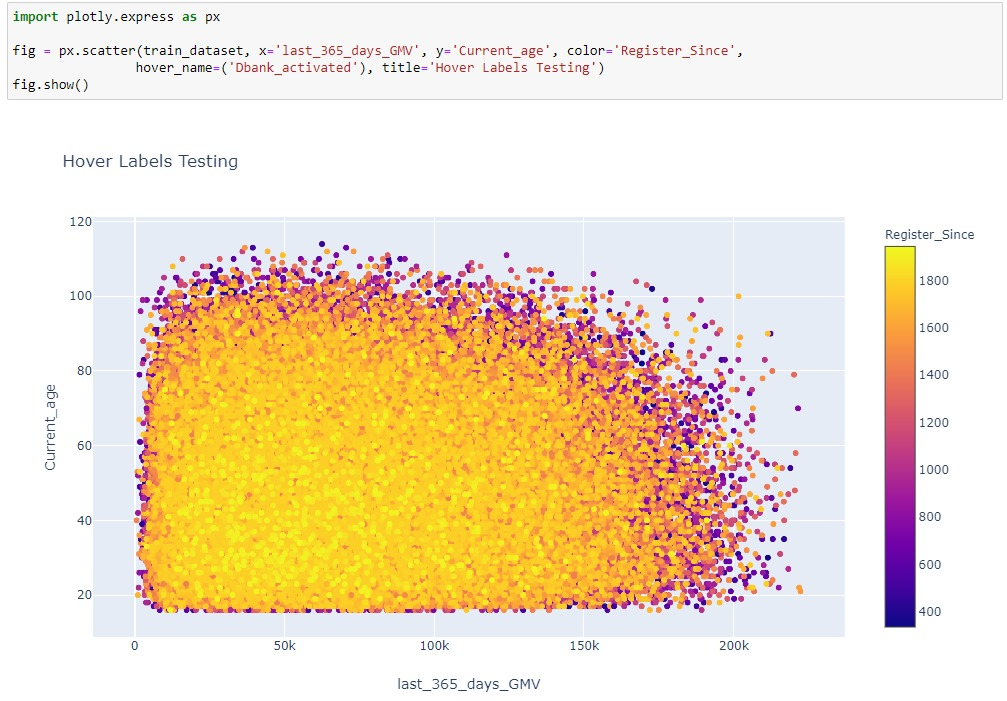

### 2. Dython
    i. Correlation Matrix and Heatmap of Complete Dataset

#### i. Correlation Matrix and Heatmap of Complete Dataset

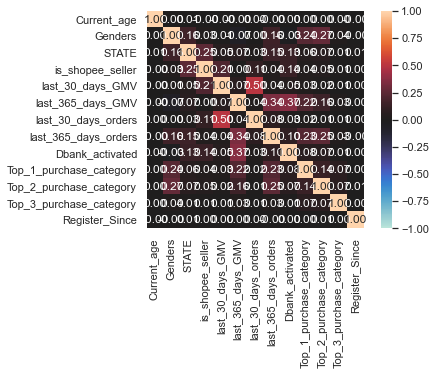

{'corr':                          Current_age   Genders     STATE  is_shopee_seller  \
 Current_age                 1.000000  0.000650  0.006864         -0.000193   
 Genders                     0.000650  1.000000  0.163684          0.033053   
 STATE                       0.006864  0.163684  1.000000          0.252006   
 is_shopee_seller           -0.000193  0.033053  0.252006          1.000000   
 last_30_days_GMV           -0.001805  0.008485  0.054698          0.212138   
 last_365_days_GMV          -0.000192 -0.067397  0.065681          0.001187   
 last_30_days_orders         0.000087  0.002643  0.028881          0.111754   
 last_365_days_orders       -0.002921  0.156610  0.152424          0.037307   
 Dbank_activated             0.000228 -0.032165  0.134465          0.138704   
 Top_1_purchase_category     0.004813  0.235021  0.059188          0.038383   
 Top_2_purchase_category     0.003872  0.273809  0.067695          0.045619   
 Top_3_purchase_category     0.004114  0.037

In [20]:
associations(train_dataset, nominal_columns='auto', numerical_columns=None, 
             mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', 
             bias_correction=True, ax=None, figsize=None, annot=True, fmt='.2f', 
             cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
             compute_only=False, clustering=False, title=None, filename=None)

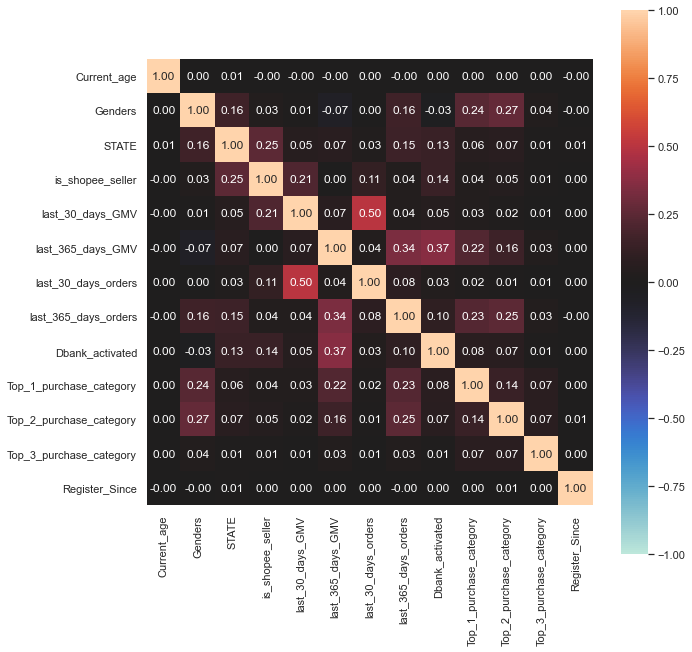

In [21]:
complete_correlation= associations(train_dataset, figsize=(10,10))

### 3. Seaborn
    i. Relationship of Numerical Features with Dbank_activated 
    ii. Relationship of Categorical Features with Dbank_activated 

#### i. Relationship of Numerical Features with Dbank_activated 
    a. last_365_days_GMV against Dbank_activated
    b. last_30_days_GMV against Dbank_activated
    c. last_365_days_orders against Dbank_activated
    d. last_30_days_orders against Dbank_activated
    e. Register_Since against Dbank_activated
    f. Current_age against Dbank_activated

##### a. last_365_days_GMV against Dbank_activated

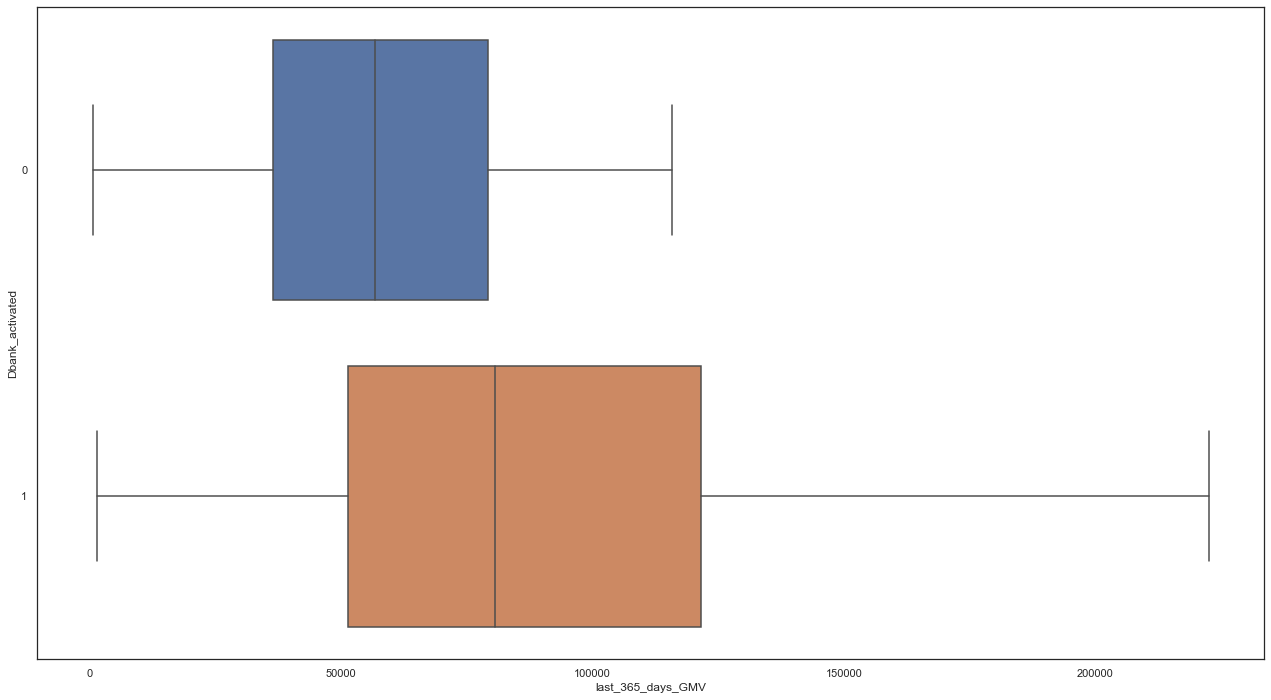

In [22]:
# sns.set_theme(style="whitegrid")
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="last_365_days_GMV", y="Dbank_activated", data=train_dataset, orient = "h")

##### b. last_30_days_GMV against Dbank_activated

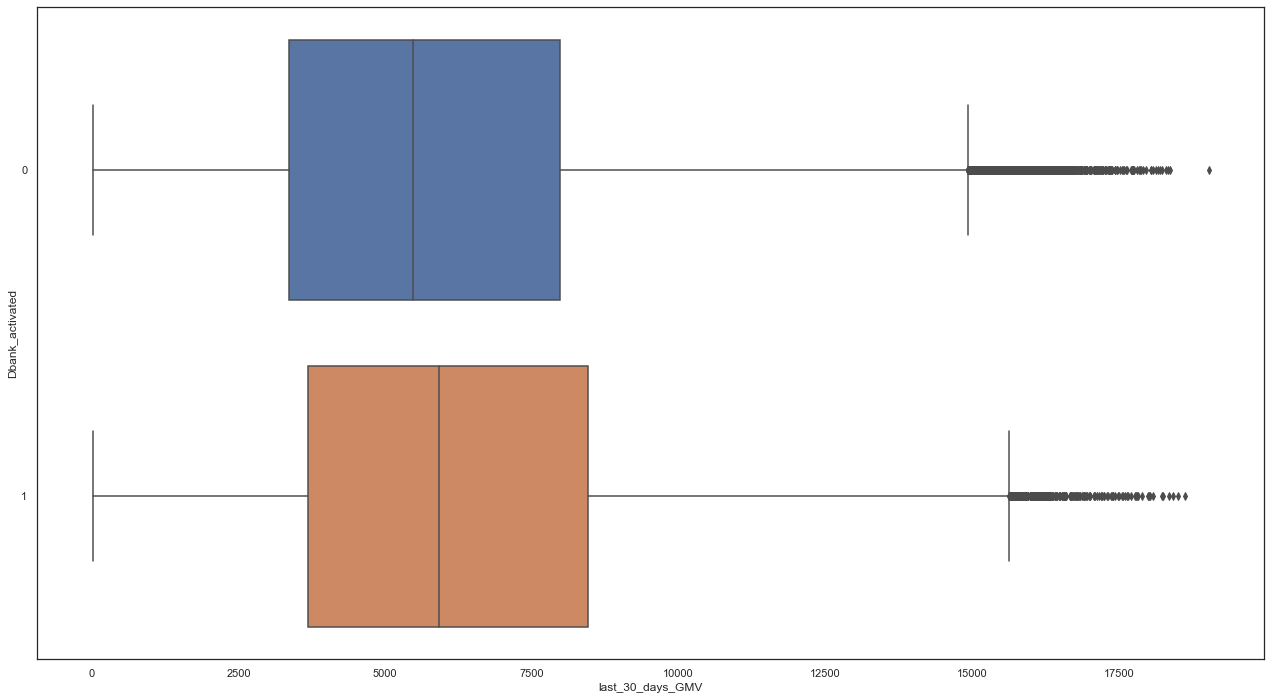

In [23]:
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="last_30_days_GMV", y="Dbank_activated", data=train_dataset, orient = "h")

##### c. last_365_days_orders against Dbank_activated

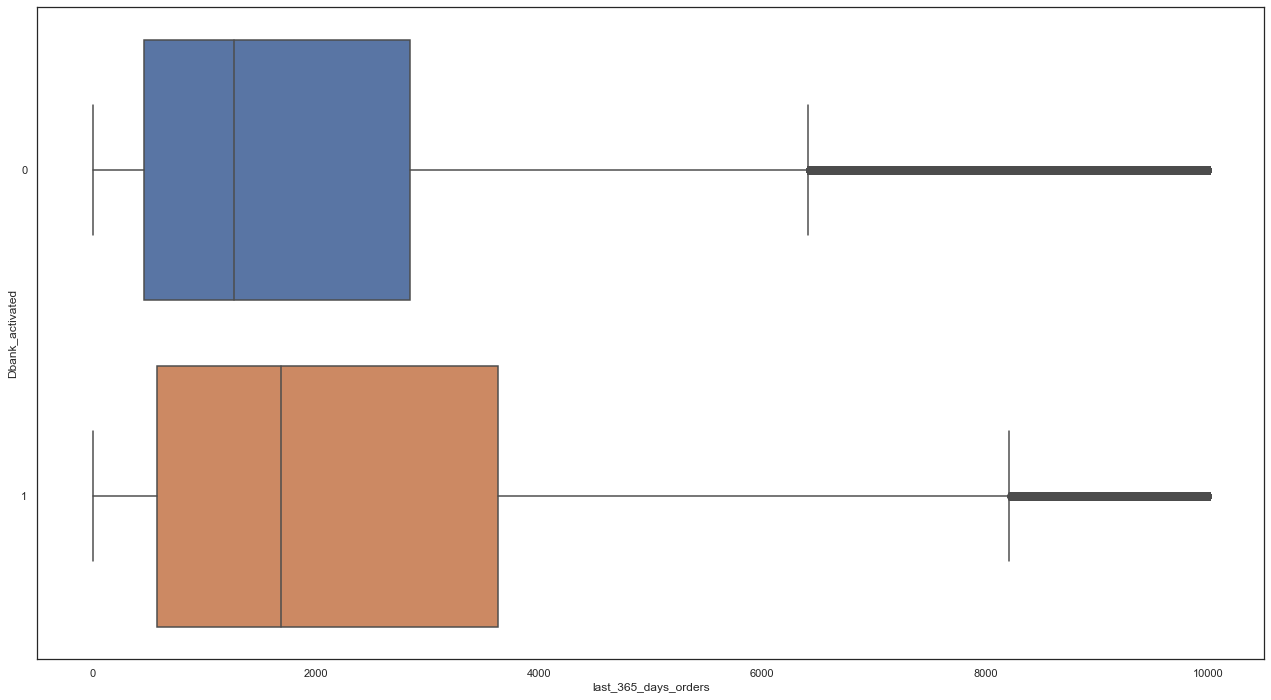

In [24]:
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="last_365_days_orders", y="Dbank_activated", data=train_dataset, orient = "h")

##### d. last_30_days_orders against Dbank_activated

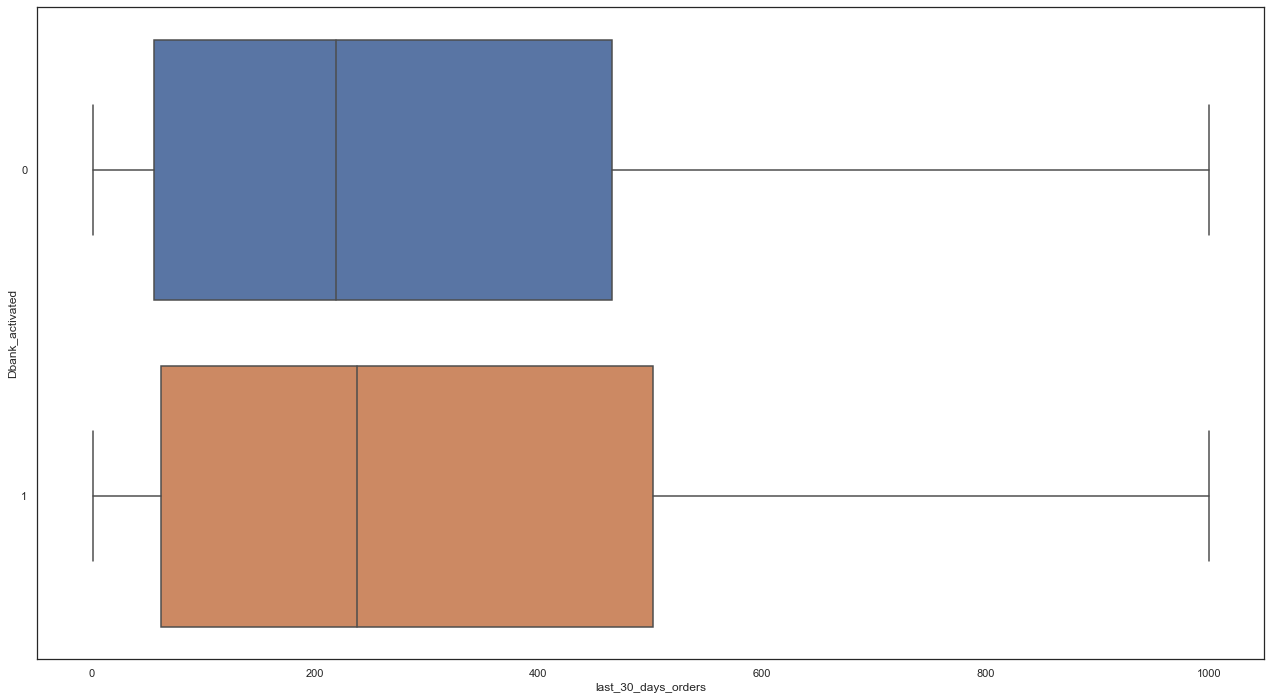

In [25]:
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="last_30_days_orders", y="Dbank_activated", data=train_dataset, orient = "h")

##### e. Register_Since against Dbank_activated

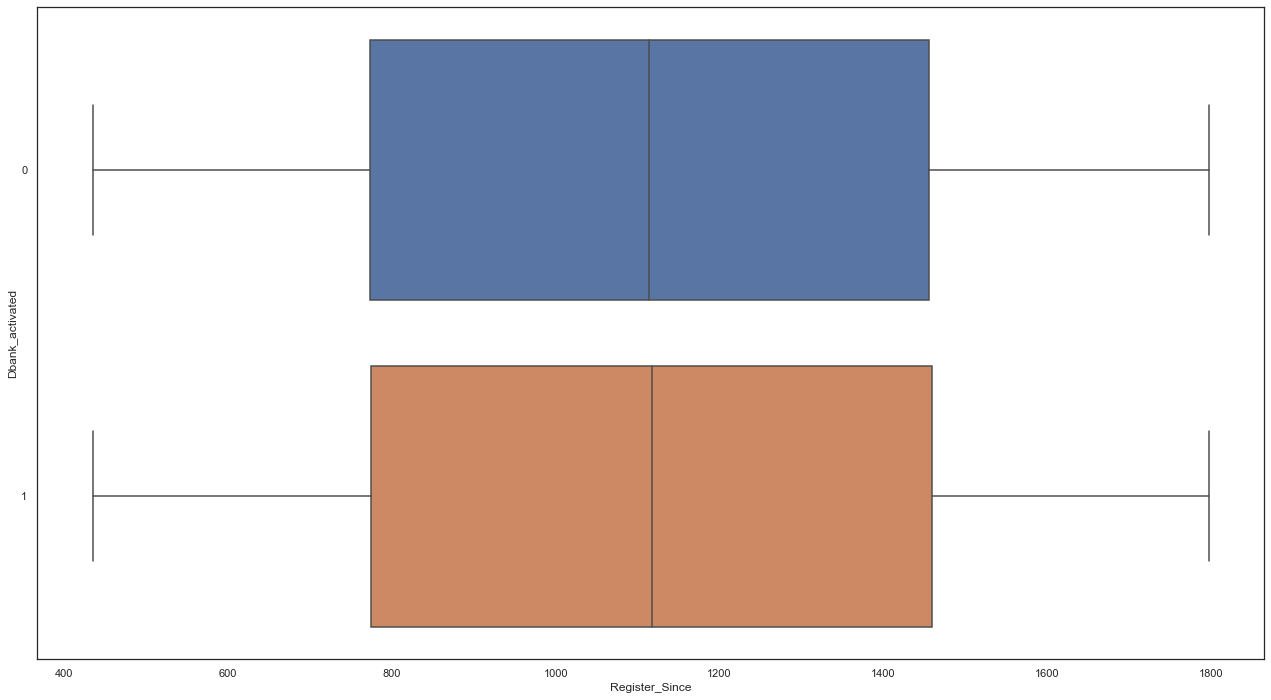

In [26]:
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="Register_Since", y="Dbank_activated", data=train_dataset, orient = "h")

##### f. Current_age against Dbank_activated

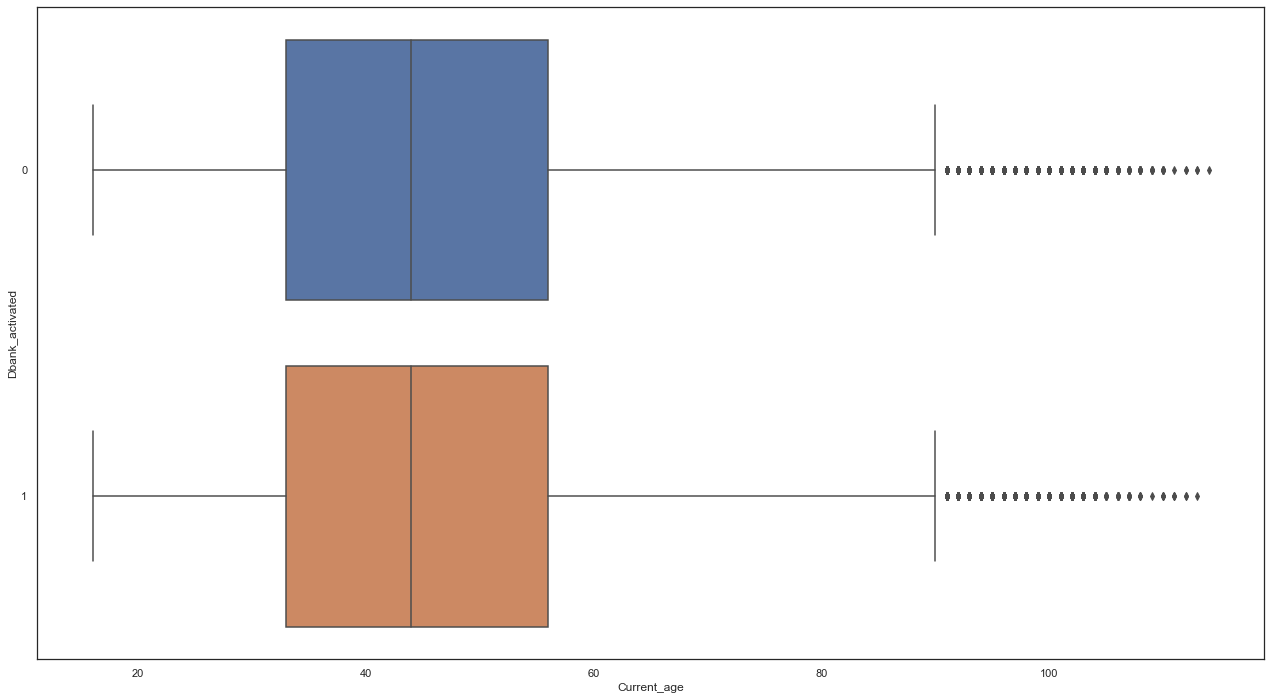

In [27]:
f, axes = plt.subplots(1, 1, figsize=(22, 12))
ax = sns.boxplot(x="Current_age", y="Dbank_activated", data=train_dataset, orient = "h")

#### ii. Relationship of Categorical Features with Dbank_activated Seaborn 
    a. STATE against Dbank_activated
    b. Top_1_purchase_category against Dbank_activated
    c. Top_2_purchase_category against Dbank_activated
    d. Top_3_purchase_category against Dbank_activated
    e. Genders against Dbank_activated
    f. is_shopee_seller against Dbank_activated

##### a. STATE against Dbank_activated

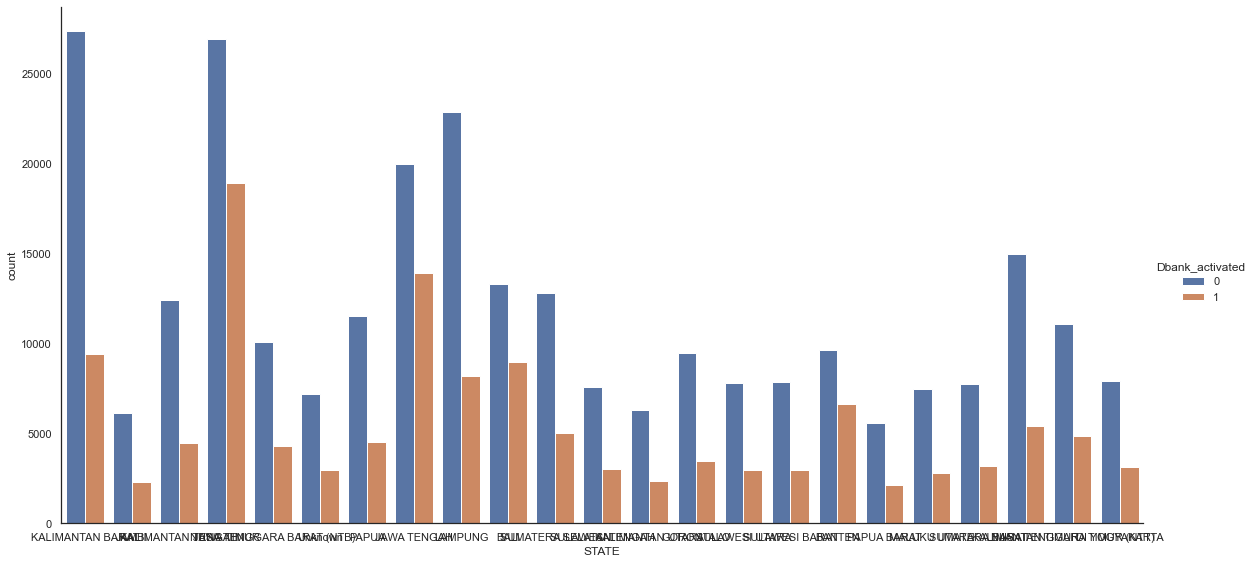

In [28]:
sns.catplot(x="STATE", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [29]:
state_activation = train_dataset.groupby(['STATE'])['Dbank_activated'].mean()
state_activation = pd.DataFrame(state_activation)
state_activation['Activated'] = state_activation['Dbank_activated']
state_activation = state_activation.drop('Dbank_activated', axis = 1)
state_activation = state_activation.sort_values(by = 'Activated', ascending=False)

state_activation.head(55)

,Activated
STATE,
JAWA TIMUR,0.412797
JAWA TENGAH,0.411241
BANTEN,0.407032
BALI,0.401912
NUSA TENGGARA TIMUR (NTT),0.303586
NUSA TENGGARA BARAT (NTB),0.298478
Unknown,0.291165
SUMATERA BARAT,0.289599
SULAWESI TENGAH,0.285378


##### b. Top_1_purchase_category against Dbank_activated

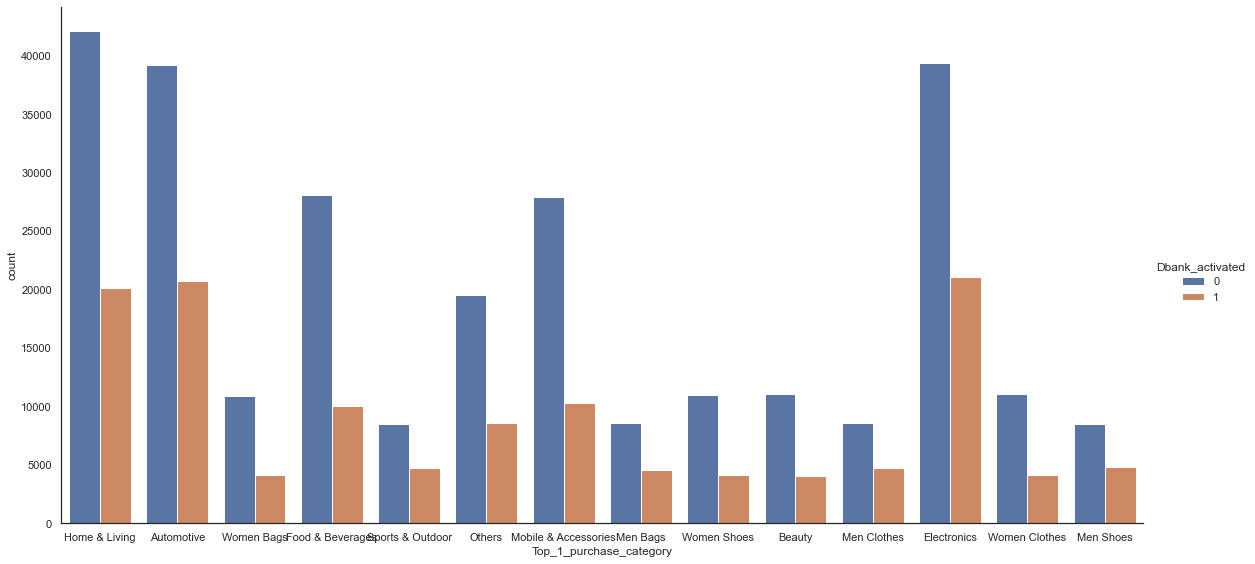

In [30]:
sns.catplot(x="Top_1_purchase_category", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [31]:
top_category_activation = train_dataset.groupby(['Top_1_purchase_category'])['Dbank_activated'].mean()
top_category_activation = pd.DataFrame(top_category_activation)
top_category_activation['Activated'] = top_category_activation['Dbank_activated']
top_category_activation = top_category_activation.drop('Dbank_activated', axis = 1)
top_category_activation = top_category_activation.sort_values(by = 'Activated', ascending=False)

top_category_activation.head(30)

,Activated
Top_1_purchase_category,
Men Shoes,0.360607
Sports & Outdoor,0.357951
Men Clothes,0.353567
Electronics,0.348465
Men Bags,0.347447
Automotive,0.346078
Home & Living,0.323207
Others,0.305241
Women Bags,0.275821


##### c. Top_2_purchase_category against Dbank_activated

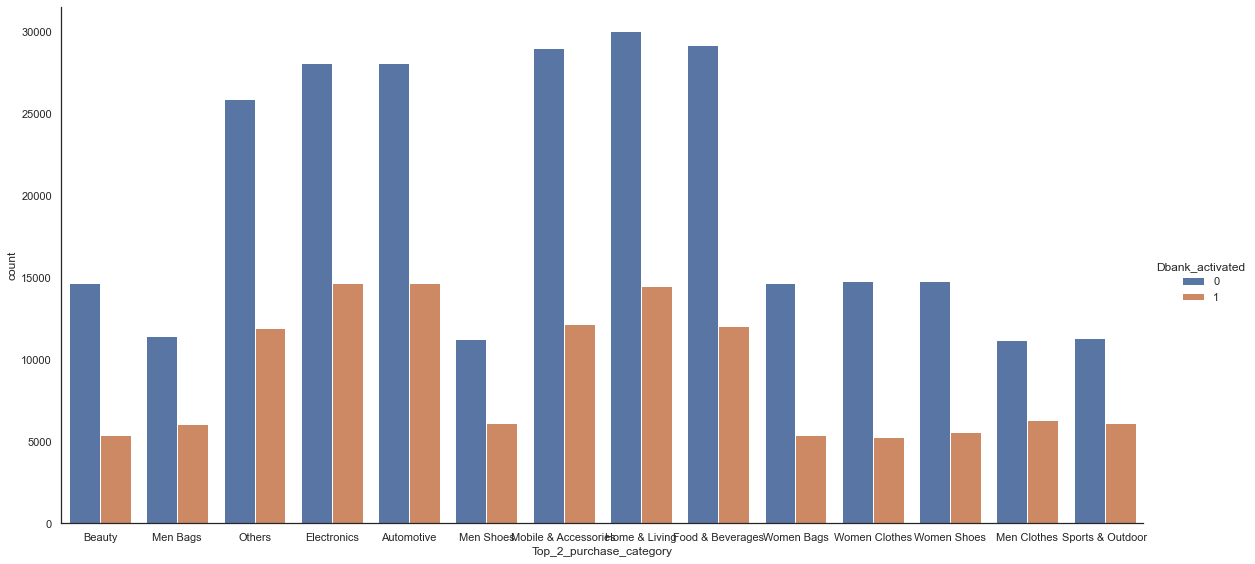

In [32]:
sns.catplot(x="Top_2_purchase_category", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [33]:
top_2_category_activation = train_dataset.groupby(['Top_2_purchase_category'])['Dbank_activated'].mean()
top_2_category_activation = pd.DataFrame(top_2_category_activation)
top_2_category_activation['Activated'] = top_2_category_activation['Dbank_activated']
top_2_category_activation = top_2_category_activation.drop('Dbank_activated', axis = 1)
top_2_category_activation = top_2_category_activation.sort_values(by = 'Activated', ascending=False)

top_2_category_activation.head(30)

,Activated
Top_2_purchase_category,
Men Clothes,0.360849
Men Shoes,0.351860
Sports & Outdoor,0.351190
Men Bags,0.346480
Electronics,0.343247
Automotive,0.342763
Home & Living,0.325426
Others,0.314363
Mobile & Accessories,0.294905


##### d. Top_3_purchase_category against Dbank_activated

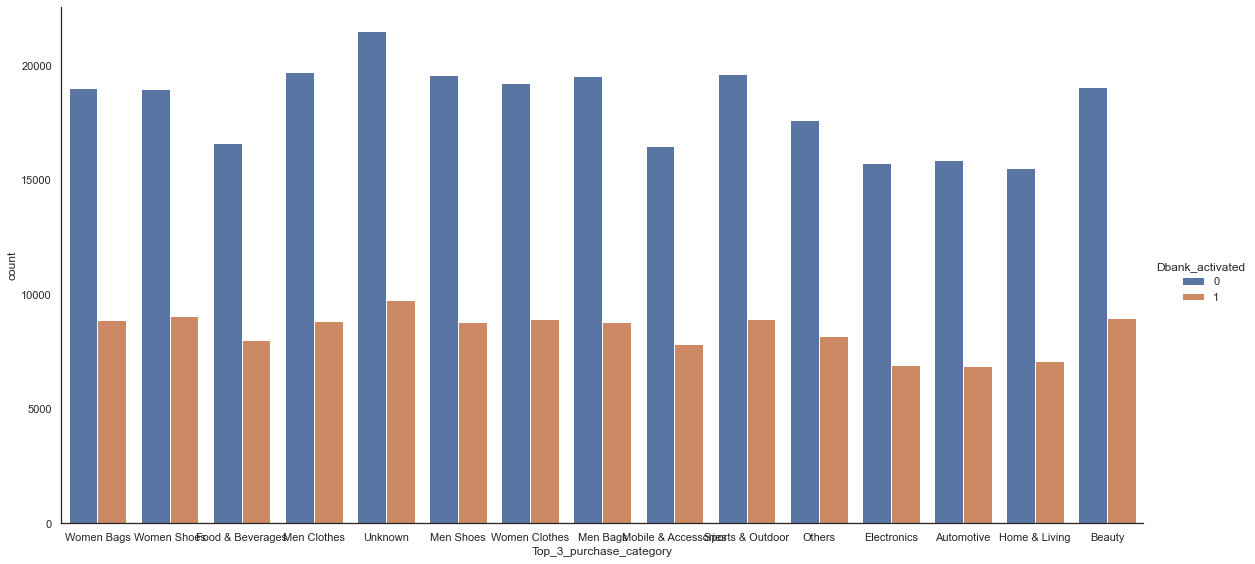

In [34]:
sns.catplot(x="Top_3_purchase_category", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [35]:
top_3_category_activation = train_dataset.groupby(['Top_3_purchase_category'])['Dbank_activated'].mean()
top_3_category_activation = pd.DataFrame(top_3_category_activation)
top_3_category_activation['Activated'] = top_3_category_activation['Dbank_activated']
top_3_category_activation = top_3_category_activation.drop('Dbank_activated', axis = 1)
top_3_category_activation = top_3_category_activation.sort_values(by = 'Activated', ascending=False)

top_3_category_activation.head(30)

,Activated
Top_3_purchase_category,
Food & Beverages,0.325389
Women Shoes,0.323670
Mobile & Accessories,0.322435
Beauty,0.319377
Women Bags,0.318087
Others,0.317592
Women Clothes,0.316615
Home & Living,0.313761
Sports & Outdoor,0.313167


##### e. Genders against Dbank_activated

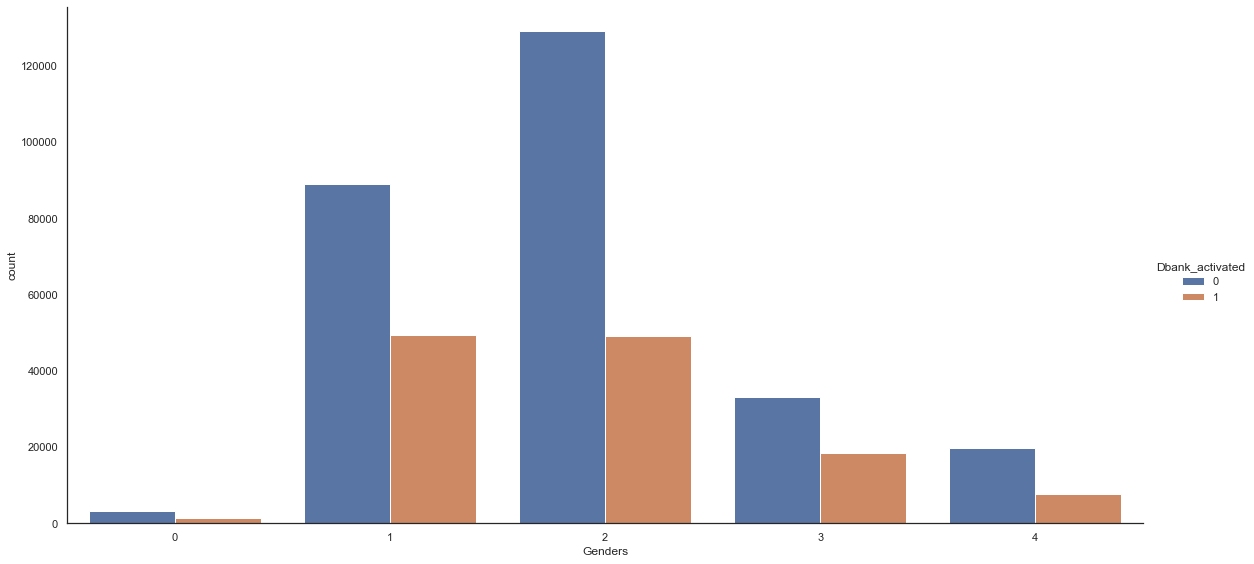

In [36]:
sns.catplot(x="Genders", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [37]:
genders_activation = train_dataset.groupby(['Genders'])['Dbank_activated'].mean()
genders_activation = pd.DataFrame(genders_activation)
genders_activation['Activated'] = genders_activation['Dbank_activated']
genders_activation = genders_activation.drop('Dbank_activated', axis = 1)
genders_activation = genders_activation.sort_values(by = 'Activated', ascending=False)

genders_activation.head(10)

,Activated
Genders,
3,0.358888
1,0.356552
0,0.295205
4,0.278791
2,0.275733


##### f. is_shopee_seller against Dbank_activated

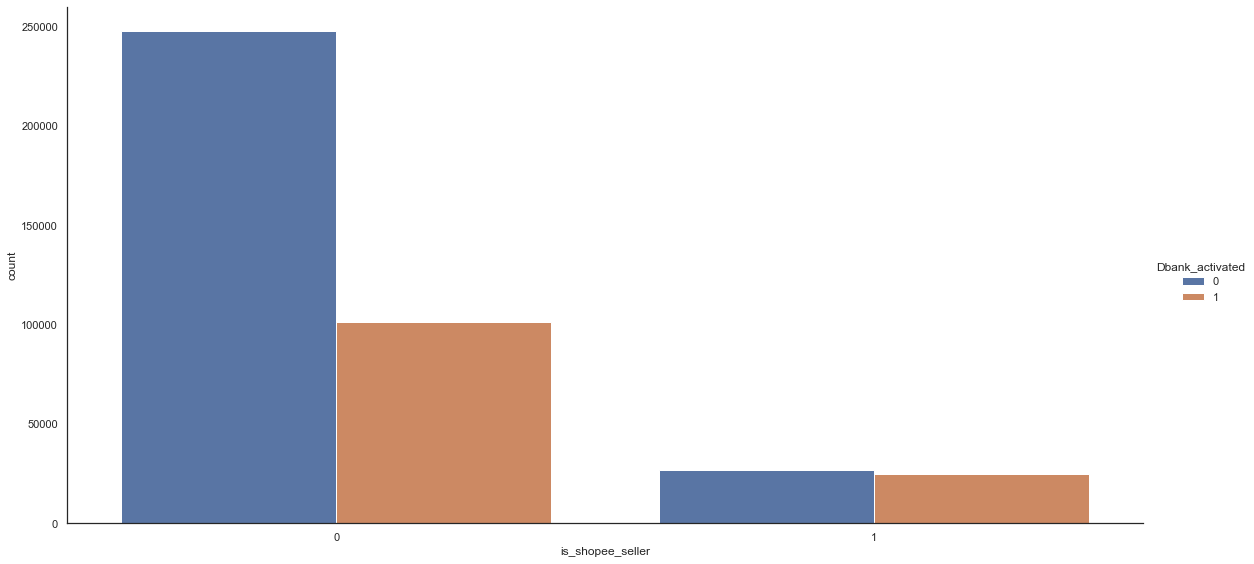

In [38]:
sns.catplot(x="is_shopee_seller", hue="Dbank_activated", kind="count",
            data=train_dataset,
            height=8, aspect=2)

In [39]:
shopee_seller_activation = train_dataset.groupby(['is_shopee_seller'])['Dbank_activated'].mean()
shopee_seller_activation = pd.DataFrame(shopee_seller_activation)
shopee_seller_activation['Activated'] = shopee_seller_activation['Dbank_activated']
shopee_seller_activation = shopee_seller_activation.drop('Dbank_activated', axis = 1)
shopee_seller_activation = shopee_seller_activation.sort_values(by = 'Activated', ascending=False)

shopee_seller_activation.head(10)

,Activated
is_shopee_seller,
1,0.482448
0,0.290067


## Feature Importance

In [40]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [41]:
X_train = train_dataset[["last_365_days_GMV","last_30_days_GMV","last_365_days_orders","last_30_days_orders","Register_Since", "Current_age"]]
Y_train = train_dataset["Dbank_activated"]
X_test = test_dataset[["last_365_days_GMV","last_30_days_GMV","last_365_days_orders","last_30_days_orders","Register_Since", "Current_age"]]
Y_test = test_dataset["Dbank_activated"]

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [42]:
feature_array = rf.feature_importances_
print(feature_array)

[0.39316088 0.14161976 0.1306062  0.10100351 0.13580281 0.09780683]


<BarContainer object of 6 artists>

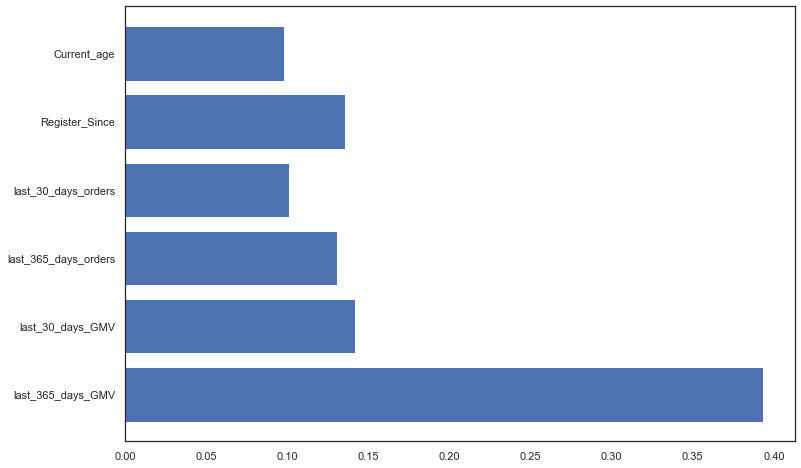

In [43]:
features_chosen = ["last_365_days_GMV","last_30_days_GMV","last_365_days_orders","last_30_days_orders","Register_Since", "Current_age"]
plt.barh(features_chosen, rf.feature_importances_)

In [44]:
feature_importance_df = pd.DataFrame(feature_array, index =["last_365_days_GMV","last_30_days_GMV","last_365_days_orders","last_30_days_orders","Register_Since", "Current_age"], columns = ["feature_importance"])
feature_importance_df = feature_importance_df.sort_values(by = 'feature_importance')
feature_importance_df.head(6)

,feature_importance
Current_age,0.097807
last_30_days_orders,0.101004
last_365_days_orders,0.130606
Register_Since,0.135803
last_30_days_GMV,0.141620
last_365_days_GMV,0.393161


## Drop Irrelevant Data

In [45]:
train_set = train_dataset.drop(columns=['last_30_days_orders', 'Current_age', 'Top_3_purchase_category'])
test_set = test_dataset.drop(columns=['last_30_days_orders', 'Current_age', 'Top_3_purchase_category'])

In [46]:
train_set.head()

,Genders,STATE,is_shopee_seller,last_30_days_GMV,last_365_days_GMV,last_365_days_orders,Dbank_activated,Top_1_purchase_category,Top_2_purchase_category,Register_Since
0,2,KALIMANTAN BARAT,0,2949,61943,46,0,Home & Living,Beauty,1797.0
1,1,JAMBI,0,7834,60755,1168,1,Automotive,Men Bags,1797.0
2,4,KALIMANTAN TENGAH,0,5552,55116,4632,0,Women Bags,Others,1797.0
3,1,JAWA TIMUR,1,9343,111888,1522,0,Food & Beverages,Men Bags,1796.0
4,3,NUSA TENGGARA BARAT (NTB),0,8712,41862,725,0,Home & Living,Electronics,1796.0


## Encoding Categorical Data

### One Hot Encoding

In [47]:
one_hot = pd.get_dummies(train_set['Genders'], prefix='gender')
result = pd.concat([train_set, one_hot], axis=1)
train_set = result.drop(['Genders'], axis=1)

one_hot = pd.get_dummies(test_set['Genders'], prefix='gender')
result = pd.concat([test_set, one_hot], axis=1)
test_set = result.drop(['Genders'], axis=1)

one_hot = pd.get_dummies(train_set['STATE'], prefix='state')
result = pd.concat([train_set, one_hot], axis=1)
train_set = result.drop(['STATE'], axis=1)

one_hot = pd.get_dummies(test_set['STATE'], prefix='state')
result = pd.concat([test_set, one_hot], axis=1)
test_set = result.drop(['STATE'], axis=1)

one_hot = pd.get_dummies(train_set['Top_1_purchase_category'], prefix='1st')
result = pd.concat([train_set, one_hot], axis=1)
train_set = result.drop(['Top_1_purchase_category'], axis=1)

one_hot = pd.get_dummies(test_set['Top_1_purchase_category'], prefix='1st')
result = pd.concat([test_set, one_hot], axis=1)
test_set = result.drop(['Top_1_purchase_category'], axis=1)

one_hot = pd.get_dummies(train_set['Top_2_purchase_category'], prefix='2nd')
result = pd.concat([train_set, one_hot], axis=1)
train_set = result.drop(['Top_2_purchase_category'], axis=1)

one_hot = pd.get_dummies(test_set['Top_2_purchase_category'], prefix='2nd')
result = pd.concat([test_set, one_hot], axis=1)
test_set = result.drop(['Top_2_purchase_category'], axis=1)

### Checking Datatype

In [48]:
train = train_set.columns.to_series().groupby(train_dataset.dtypes).groups
train

{dtype('int64'): Index(['is_shopee_seller', 'last_30_days_GMV', 'last_365_days_GMV',
        'last_365_days_orders', 'Dbank_activated'],
       dtype='object'),
 dtype('float64'): Index(['Register_Since'], dtype='object')}

In [49]:
test = test_set.columns.to_series().groupby(test_dataset.dtypes).groups
test

{dtype('int64'): Index(['is_shopee_seller', 'last_30_days_GMV', 'last_365_days_GMV',
        'last_365_days_orders', 'Dbank_activated'],
       dtype='object'),
 dtype('float64'): Index(['Register_Since'], dtype='object')}

## Machine Learning Models (3)

### 1. Random Forest

In [50]:
x_train = train_set.drop(["Dbank_activated"], axis=1)
y_train = train_set["Dbank_activated"]
x_test  = test_set.drop(["Dbank_activated"], axis=1)
y_test = test_set['Dbank_activated']

In [51]:
x_train.shape,y_train.shape

((400000, 61), (400000,))

In [52]:
forest = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=10, bootstrap=True)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=150)

In [53]:
y_pred = forest.predict(x_test)

In [54]:
y_train.shape,y_pred.shape

((400000,), (100000,))

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.78786

In [56]:
confusion_matrix(y_test, y_pred)

array([[68711,     6],
       [21208, 10075]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     68717
           1       1.00      0.32      0.49     31283

    accuracy                           0.79    100000
   macro avg       0.88      0.66      0.68    100000
weighted avg       0.84      0.79      0.75    100000



In [58]:
forest.score(x_train, y_train)
acc_random_forest = round(forest.score(x_train, y_train)* 100, 2)
acc_random_forest

78.51

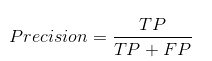

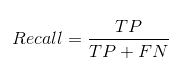

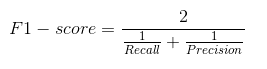

### 1. Random Forest (Excluding Outliers)

In [59]:
train_dataset = train_set
test_dataset = test_set

In [60]:
train_dataset =  train_dataset[(train_dataset['last_365_days_GMV'] >= train_dataset['last_365_days_GMV'].quantile(0.000)) &
                              (train_dataset['last_365_days_GMV'] <= train_dataset['last_365_days_GMV'].quantile(0.9189))]
train_dataset =  train_dataset[(train_dataset['last_30_days_GMV'] >= train_dataset['last_30_days_GMV'].quantile(0.000)) &
                               (train_dataset['last_30_days_GMV'] <= train_dataset['last_30_days_GMV'].quantile(0.9189))]
train_dataset =  train_dataset[(train_dataset['last_365_days_orders'] >= train_dataset['last_365_days_orders'].quantile(0.000)) &
                         (train_dataset['last_365_days_orders'] <= train_dataset['last_365_days_orders'].quantile(0.9189))]
train_dataset =  train_dataset[(train_dataset['Dbank_activated'] >= train_dataset['Dbank_activated'].quantile(0.000)) &
                               (train_dataset['Dbank_activated'] <= train_dataset['Dbank_activated'].quantile(0.9189))]
test_dataset =  test_dataset[(test_dataset['last_365_days_GMV'] >= test_dataset['last_365_days_GMV'].quantile(0.000)) &
                               (test_dataset['last_365_days_GMV'] <= test_dataset['last_365_days_GMV'].quantile(0.9189))]
test_dataset =  test_dataset[(test_dataset['last_30_days_GMV'] >= test_dataset['last_30_days_GMV'].quantile(0.000)) &
                               (test_dataset['last_30_days_GMV'] <= test_dataset['last_30_days_GMV'].quantile(0.9189))]
test_dataset =  test_dataset[(test_dataset['last_365_days_orders'] >= test_dataset['last_365_days_orders'].quantile(0.000)) &
                               (test_dataset['last_365_days_orders'] <= test_dataset['last_365_days_orders'].quantile(0.9189))]
test_dataset =  test_dataset[(test_dataset['Dbank_activated'] >= test_dataset['Dbank_activated'].quantile(0.000)) &
                               (test_dataset['Dbank_activated'] <= test_dataset['Dbank_activated'].quantile(0.9189))]
train_dataset.shape, test_dataset.shape

((310369, 62), (77591, 62))

In [61]:
x_train = train_set.drop(["Dbank_activated"], axis=1)
y_train = train_set["Dbank_activated"]
x_test  = test_set.drop(["Dbank_activated"], axis=1)
y_test = test_set['Dbank_activated']

forest = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=10, bootstrap=True)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.78787

In [63]:
confusion_matrix(y_test, y_pred)

array([[68710,     7],
       [21206, 10077]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     68717
           1       1.00      0.32      0.49     31283

    accuracy                           0.79    100000
   macro avg       0.88      0.66      0.68    100000
weighted avg       0.84      0.79      0.75    100000



In [65]:
forest.score(x_train, y_train)
acc_random_forest = round(forest.score(x_train, y_train)* 100, 2)
acc_random_forest

78.51

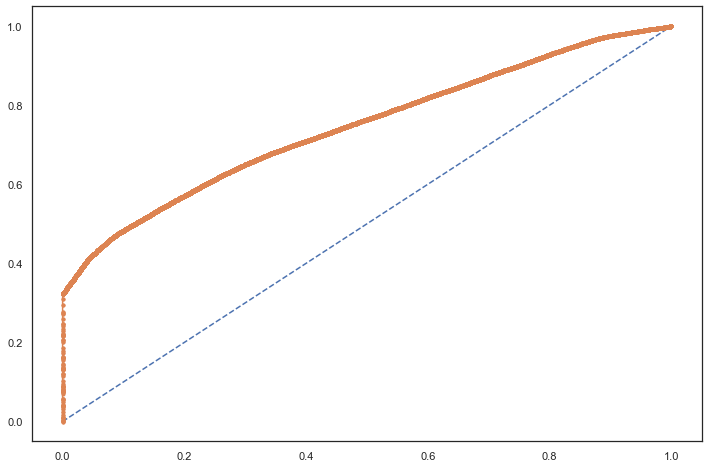

AUC:  0.7448981330638663


In [66]:
from sklearn.metrics import roc_curve, auc #for model evaluation
# predict probabilities
probs = forest.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
print('AUC: ',auc(fpr, tpr))

### SHAP Values

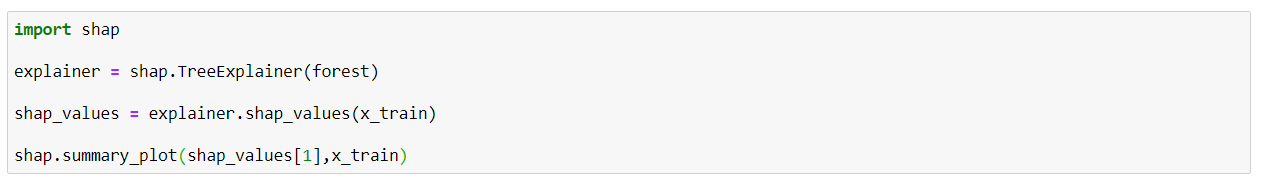

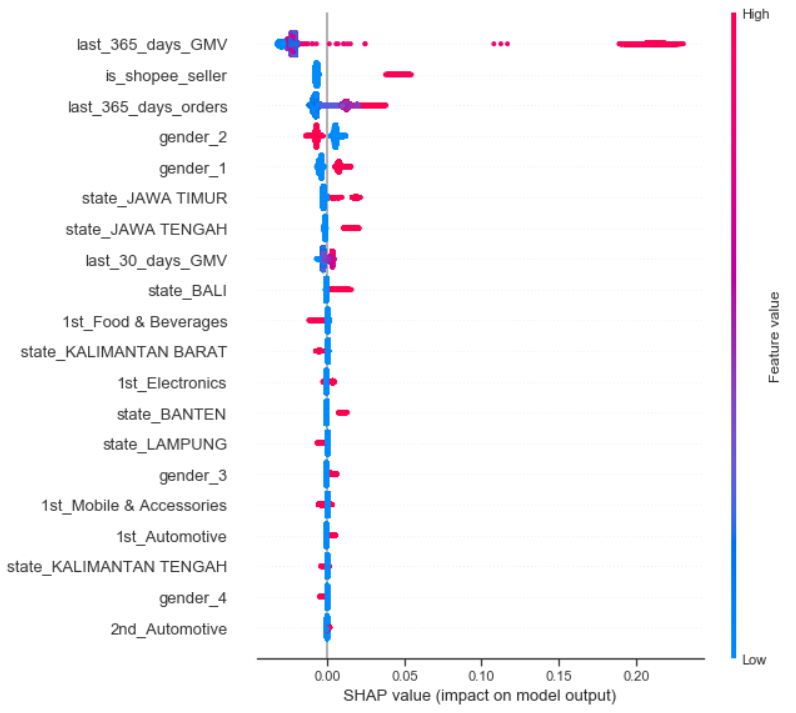

### Decision Tree

In [67]:
x_train = train_set.drop(["Dbank_activated"], axis=1)
y_train = train_set["Dbank_activated"]
x_test  = test_set.drop(["Dbank_activated"], axis=1)
y_test = test_set['Dbank_activated']

In [68]:
x_train.shape,y_train.shape

((400000, 61), (400000,))

In [69]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

In [70]:
# Train the Decision Tree Classifier model
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

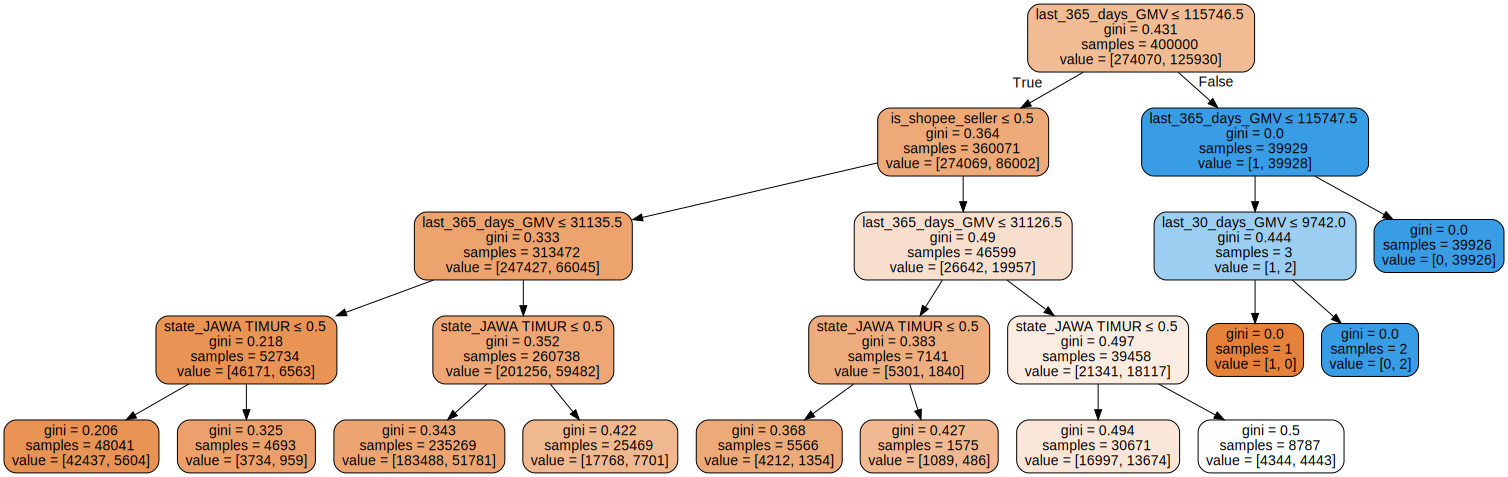

In [71]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

### 2. K Fold Cross Validation

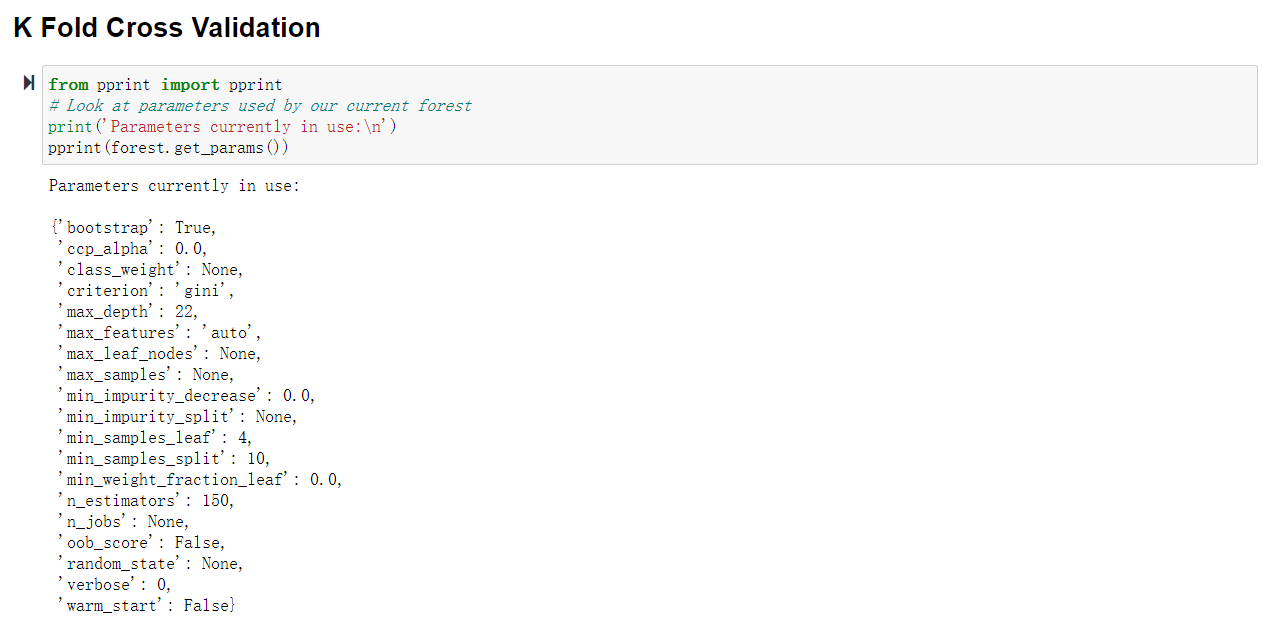

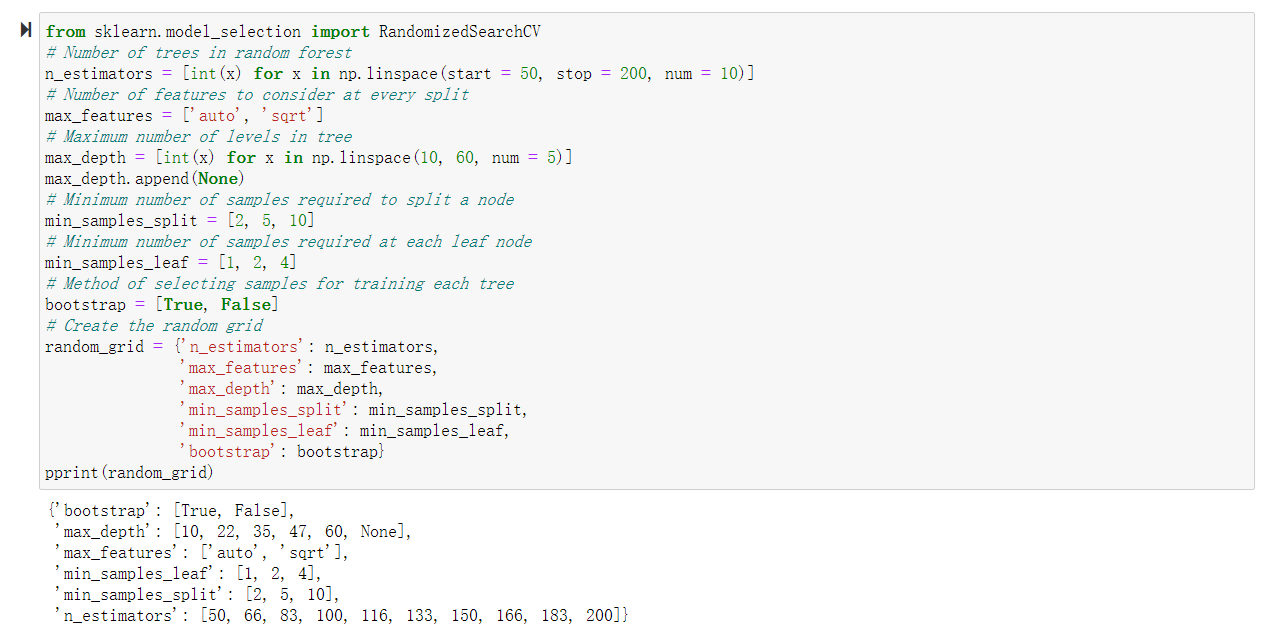

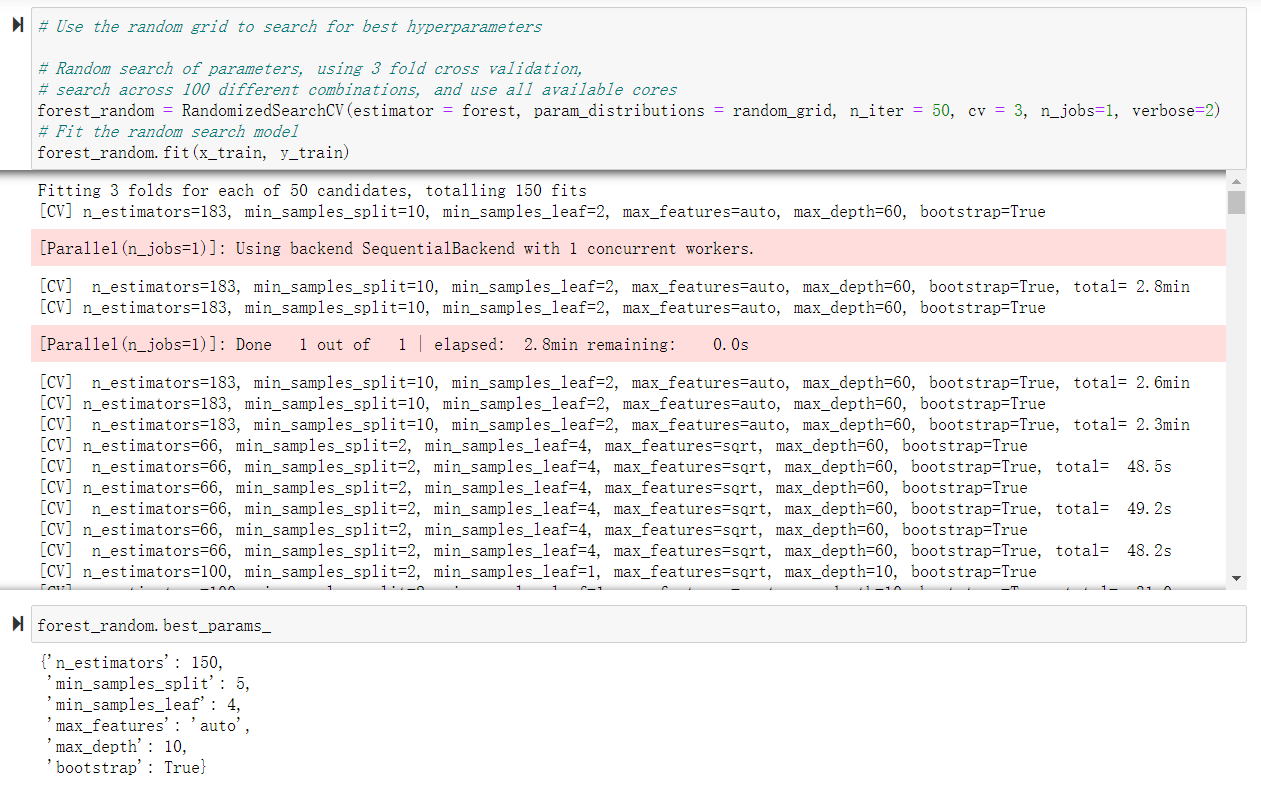

### 3. Neural Network


In [73]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(448, activation='sigmoid', input_dim=61),
    tf.keras.layers.Dense(112, activation='sigmoid'),
    tf.keras.layers.Dense(28, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])


model.compile(optimizer = 'adam',                                                  
              loss = 'binary_crossentropy',                                        
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 64)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

Epoch 1/30
6250/6250 [==============================] - 14s 2ms/step - loss: 0.6208 - accuracy: 0.6852
Epoch 2/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.6162 - accuracy: 0.6852
Epoch 3/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.6135 - accuracy: 0.6857
Epoch 4/30
6250/6250 [==============================] - 14s 2ms/step - loss: 0.6113 - accuracy: 0.6862
Epoch 5/30
6250/6250 [==============================] - 15s 2ms/step - loss: 0.6092 - accuracy: 0.6863
Epoch 6/30
6250/6250 [==============================] - 14s 2ms/step - loss: 0.6135 - accuracy: 0.6852
Epoch 7/30
6250/6250 [==============================] - 14s 2ms/step - loss: 0.6119 - accuracy: 0.6851
Epoch 8/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.6124 - accuracy: 0.6852
Epoch 9/30
6250/6250 [==============================] - 16s 3ms/step - loss: 0.6100 - accuracy: 0.6852
Epoch 10/30
6250/6250 [==============================] - 16s 3ms/step - l